In [29]:
import keras
keras.__version__

'2.3.0'

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
train_labels[10]

3

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

In [11]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 172us/step - loss: 2.7854 - accuracy: 0.5020 - val_loss: 1.8701 - val_accuracy: 0.6350
Epoch 2/20
7982/7982 [==============================] - 1s 144us/step - loss: 1.4833 - accuracy: 0.6997 - val_loss: 1.3404 - val_accuracy: 0.7010
Epoch 3/20
7982/7982 [==============================] - 1s 144us/step - loss: 1.0595 - accuracy: 0.7764 - val_loss: 1.1446 - val_accuracy: 0.7760
Epoch 4/20
7982/7982 [==============================] - 1s 140us/step - loss: 0.8275 - accuracy: 0.8291 - val_loss: 1.0256 - val_accuracy: 0.7910
Epoch 5/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.6533 - accuracy: 0.8637 - val_loss: 0.9560 - val_accuracy: 0.8130
Epoch 6/20
7982/7982 [==============================] - 1s 145us/step - loss: 0.5235 - accuracy: 0.8903 - val_loss: 0.9249 - val_accuracy: 0.8020
Epoch 7/20
7982/7982 [==============================] - 1s 140us/step - los

In [16]:
import matplotlib.pyplot as plt

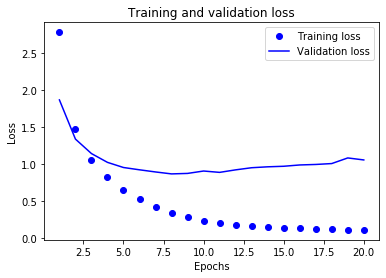

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

KeyError: 'acc'

<Figure size 432x288 with 0 Axes>

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 151us/step - loss: 2.5529 - accuracy: 0.5278 - val_loss: 1.6965 - val_accuracy: 0.6380
Epoch 2/9
7982/7982 [==============================] - 1s 138us/step - loss: 1.4146 - accuracy: 0.7097 - val_loss: 1.2961 - val_accuracy: 0.7040
Epoch 3/9
7982/7982 [==============================] - 1s 139us/step - loss: 1.0420 - accuracy: 0.7824 - val_loss: 1.1257 - val_accuracy: 0.7580
Epoch 4/9
7982/7982 [==============================] - 1s 139us/step - loss: 0.8122 - accuracy: 0.8270 - val_loss: 1.0264 - val_accuracy: 0.7770
Epoch 5/9
7982/7982 [==============================] - 1s 142us/step - loss: 0.6389 - accuracy: 0.8672 - val_loss: 0.9661 - val_accuracy: 0.7910
Epoch 6/9
7982/7982 [==============================] - 1s 146us/step - loss: 0.5068 - accuracy: 0.8959 - val_loss: 0.9135 - val_accuracy: 0.8130
Epoch 7/9
7982/7982 [==============================] - 1s 142us/step - loss: 0.405

In [20]:
results

[0.9928809197375739, 0.790739119052887]

In [21]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.201246660730187

In [22]:
predictions = model.predict(x_test)

In [23]:
predictions[0].shape

(46,)

In [24]:
np.sum(predictions[0])

1.0000004

In [25]:
np.argmax(predictions[0])

3

In [26]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [27]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [28]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 218us/step - loss: 3.5152 - accuracy: 0.3799 - val_loss: 3.2285 - val_accuracy: 0.4820
Epoch 2/20
7982/7982 [==============================] - 2s 194us/step - loss: 3.0800 - accuracy: 0.4916 - val_loss: 2.9813 - val_accuracy: 0.4960
Epoch 3/20
7982/7982 [==============================] - 2s 192us/step - loss: 2.8661 - accuracy: 0.5130 - val_loss: 2.7993 - val_accuracy: 0.4840
Epoch 4/20
7982/7982 [==============================] - 2s 206us/step - loss: 2.5711 - accuracy: 0.3177 - val_loss: 2.4834 - val_accuracy: 0.2820
Epoch 5/20
7982/7982 [==============================] - 2s 202us/step - loss: 2.2330 - accuracy: 0.2820 - val_loss: 2.1697 - val_accuracy: 0.2750
Epoch 6/20
7982/7982 [==============================] - 2s 194us/step - loss: 1.8432 - accuracy: 0.3944 - val_loss: 1.7350 - val_accuracy: 0.5960
Epoch 7/20
7982/7982 [==============================] - 2s 197us/step - loss